# Анализ бизнес-показателей развлекательного приложения

**Объект исследования:** 

Данные о пользователях развлекательного приложения Procrastinate Pro+, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

**Цель исследования:**
- разобраться, почему несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки, 
- помочь компании выйти в плюс.

**План выполнения проекта:**

1. Загрузка данных и подготовка их к анализу.

2. Задание функций для расчёта и анализа LTV, ROI, удержания и конверсии.


3. Исследовательский анализ данных.
- Составление профилей пользователей, определение минимальной и максимальной даты привлечения пользователей.
- Определение из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. 
- Построение таблицы, отражающей количество пользователей и долю платящих из каждой страны.
- Определение какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. 
- Построение таблицы, отражающей количество пользователей и долю платящих для каждого устройства.
- Изучение рекламных источников привлечения и определение каналов, из которых пришло больше всего платящих пользователей. 
- Построение таблицы, отражающей количество пользователей и долю платящих для каждого канала привлечения.

4. Маркетинг
- Рассчет общей суммы расходов на маркетинг.
- Определение как траты распределены по рекламным источникам.
- Визуализация динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. 
- Определение сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. 

5. Оценка окупаемости рекламы
- Определение момента и горизонта анализа.
- Анализ окупаемости рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Изучение конверсии и удержания пользователей, а также динамики их изменения. 
- Анализ окупаемости рекламы с разбивкой по устройствам. 
- Анализ окупаемости рекламы с разбивкой по странам. 
- Аназиз окупаемости рекламы с разбивкой по рекламным каналам. 

6. Общий вывод
- Причины неэффективности привлечения пользователей.
- Рекомендации для отдела маркетинга.

### Загрузка данных и подготовка их к анализу

In [1]:
# Импортирую нужные библиотеки
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
# Загружаю данные
try:
    visits, orders, costs = (
                            pd.read_csv('visits_info_short.csv'),
                            pd.read_csv('orders_info_short.csv'),
                            pd.read_csv('costs_info_short.csv')
                            )
except:
    visits, orders, costs = (
                            pd.read_csv('/datasets/visits_info_short.csv'),
                            pd.read_csv('/datasets/orders_info_short.csv'),
                            pd.read_csv('/datasets/costs_info_short.csv')
                            )

Изучу данные.

In [3]:
print('Журнал сессий')
display(visits.head())
visits.info()

Журнал сессий


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [4]:
print('Заказы')
display(orders.head())
orders.info()

Заказы


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [5]:
print('Расходы')
display(costs.head())
costs.info()

Расходы


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Пропуски в данных отсутствуют. 
Необходимо провести предобработку данных: привести названия столбцов в таблицах в соответствие с хорошим стилем, привести типы данных во всех колонках в соответствие сохранённым в них значениям.

In [6]:
# Переименую столбцы: все символы сделаю строчными,устраню пробелы, несколько слов в названии запишу в «змеином_регистре».
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns.values]
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns.values]
costs.columns = [x.lower().replace(' ', '_') for x in costs.columns.values]

In [7]:
# Проверю названия столбцов
visits.columns, orders.columns, costs.columns

(Index(['user_id', 'region', 'device', 'channel', 'session_start',
        'session_end'],
       dtype='object'),
 Index(['user_id', 'event_dt', 'revenue'], dtype='object'),
 Index(['dt', 'channel', 'costs'], dtype='object'))

In [8]:
# Преобразую данные о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [9]:
# Найду дубликаты, предворительно приведя к нижнему регистру все текстовые значения:
visits.region = visits.region.str.lower()
visits.device = visits.device.str.lower()
visits.channel = visits.channel.str.lower()
costs.channel = costs.channel.str.lower()
print('Количество дубликатов в таблице Журнал сессий: ', visits.duplicated().sum())
print('Количество дубликатов в таблице Заказы: ', orders.duplicated().sum())
print('Количество дубликатов в таблице Расходы: ', costs.duplicated().sum())

Количество дубликатов в таблице Журнал сессий:  0
Количество дубликатов в таблице Заказы:  0
Количество дубликатов в таблице Расходы:  0


**Дубликаты и пропуски в даных отсутствуют. Названия столбцов в таблицах приведены в соответствие с хорошим стилем, типы данных во всех колонках приведены в соответствие с сохранёнными в них значениями.**

### Задание функций для расчёта и анализа LTV, ROI, удержания и конверсии.

In [10]:
# Задаю функцию get_profiles() для создания профилей пользователей

def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [11]:
# Задаю функцию get_retention() для подсчёта Retention Rate

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [12]:
# Задаю функцию get_conversion() для подсчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [13]:
# Задаю функцию get_ltv() для подсчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [14]:
# Задаю функцию filter_data() для сглаживания данных

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [15]:
# Задаю функцию plot_retention() для построения графика Retention Rate

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [16]:
# Задаю функцию plot_conversion() для построения графика конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [17]:
# Задаю функцию plot_ltv_roi для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

**Заданы следующие функции:**
- get_profiles() — для создания профилей пользователей,
- get_retention() — для подсчёта Retention Rate,
- get_conversion() — для подсчёта конверсии,
- get_ltv() — для подсчёта LTV,
- filter_data() — для сглаживания данных,
- plot_retention() — для построения графика Retention Rate,
- plot_conversion() — для построения графика конверсии,
- plot_ltv_roi — для визуализации LTV и ROI.

### Исследовательский анализ данных

#### Профили пользователей

In [18]:
# Составляю профили пользователей
events=[]
profiles = get_profiles(visits, orders, events, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,faceboom,mac,united states,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,faceboom,iphone,united states,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iphone,france,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,adnonsense,pc,germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,yrabbit,iphone,united states,2019-10-02,2019-10-01,False,0.230769


In [19]:
# Определяю минимальную дату привлечения пользователей
profiles.first_ts.min()

Timestamp('2019-05-01 00:00:41')

In [20]:
# Определяю максимальную дату привлечения пользователей
profiles.first_ts.max()

Timestamp('2019-10-27 23:59:04')

Вывожу даты с помощью f строки

In [21]:
print(f'Минимальная дата привлечения пользователей: {profiles.first_ts.min()}')
print(f'Максимальная дата привлечения пользователей: {profiles.first_ts.max()}')

Минимальная дата привлечения пользователей: 2019-05-01 00:00:41
Максимальная дата привлечения пользователей: 2019-10-27 23:59:04


**Профили пользователей составлены с помощью ранее заданной функции. Минимальная дата привлечения пользователей - 1 мая 2019 года, максимальная - 27 октября 2019 года, что соответствует описанию проекта.**

#### Распределение пользователей по странам

Создам фнкцию для группировки пользователей

In [22]:
 def profiles_grouped(segment):
        result = (profiles.groupby(segment).agg({'payer':['sum', 'mean'], 'user_id':'count'}))
        result.columns=['number_of_payers', 'payer_ratio', 'number_of_users']
        result.payer_ratio = result.payer_ratio.apply(lambda x: format(x,'.2%'))
        return result.sort_values(by='number_of_payers', ascending = False)

Сгруппирую пользователей по странам, используя созданную функцию

In [23]:
profiles_grouped('region')

,number_of_payers,payer_ratio,number_of_users
region,,,
united states,6902,6.90%,100002
uk,700,3.98%,17575
france,663,3.80%,17450
germany,616,4.11%,14981


In [24]:
# Сгруппирую пользователей по странам
profiles_countries = (profiles.groupby('region').agg({'payer':['sum', 'mean'], 'user_id':'count'}))
# Переименую столбцы 
profiles_countries.columns=['number_of_payers', 'payer_ratio', 'number_of_users']
# Изменю формат столбца 'payer_ratio'
profiles_countries.payer_ratio = profiles_countries.payer_ratio.apply(lambda x: format(x,'.2%'))
# Отсортирую таблицу по количеству платящих пользователей
profiles_countries.sort_values(by='number_of_payers', ascending = False)

,number_of_payers,payer_ratio,number_of_users
region,,,
united states,6902,6.90%,100002
uk,700,3.98%,17575
france,663,3.80%,17450
germany,616,4.11%,14981


**Больше всего пользователей, в том числе платящих, приходит из США. Так же доля платящих пользователей в США наибольшая. Наименьшая доля платящих пользователей - во Франции, при этом наименьшее количество платящих пользоваталей приходится на Германию.**

#### Распределение пользователей по устройствам

In [25]:
# Сгруппирую пользователей по устройствам
profiles_devices = (profiles.groupby('device').agg({'payer':['sum', 'mean'], 'user_id':'count'}))
# Переименую столбцы 
profiles_devices.columns=['number_of_payers', 'payer_ratio', 'number_of_users']
# Изменю формат столбца 'payer_ratio'
profiles_devices.payer_ratio = profiles_devices.payer_ratio.apply(lambda x: format(x, '.2%'))
# Отсортирую таблицу по количеству платящих пользователей
profiles_devices.sort_values(by='number_of_payers', ascending = False)

,number_of_payers,payer_ratio,number_of_users
device,,,
iphone,3382,6.21%,54479
android,2050,5.85%,35032
mac,1912,6.36%,30042
pc,1537,5.05%,30455


Сгруппирую пользователей по устройствам, используя созданную функцию

In [26]:
profiles_grouped('device')

,number_of_payers,payer_ratio,number_of_users
device,,,
iphone,3382,6.21%,54479
android,2050,5.85%,35032
mac,1912,6.36%,30042
pc,1537,5.05%,30455


**Наибольшее число пользователей, в том числе платящих, используют iPhone. Меньше всего платящих пользователей используют PC. При этом наибольшая доля платящих пользователей - среди владельцев Mac, а наименьшая - среди использующих PC.**

#### Распределение пользователей по каналам привлечения

In [27]:
# Сгруппирую пользователей по каналам привлечения
profiles_channels = (profiles.groupby('channel').agg({'payer':['sum', 'mean'], 'user_id':'count'}))
# Переименую столбцы 
profiles_channels.columns=['number_of_payers', 'payer_ratio', 'number_of_users']
# Изменю формат столбца 'payer_ratio'
profiles_channels.payer_ratio = profiles_channels.payer_ratio.apply(lambda x: format(x, '.2%'))
# Отсортирую таблицу по количеству платящих пользователей
profiles_channels.sort_values(by='number_of_payers', ascending = False)

,number_of_payers,payer_ratio,number_of_users
channel,,,
faceboom,3557,12.20%,29144
tiptop,1878,9.60%,19561
organic,1160,2.06%,56439
wahoonetbanner,453,5.30%,8553
adnonsense,440,11.34%,3880
rocketsuperads,352,7.91%,4448
leapbob,262,3.06%,8553
opplecreativemedia,233,2.71%,8605
lambdamediaads,225,10.47%,2149


Сгруппирую пользователей по каналам привлечения, используя созданную функцию

In [28]:
profiles_grouped('channel')

,number_of_payers,payer_ratio,number_of_users
channel,,,
faceboom,3557,12.20%,29144
tiptop,1878,9.60%,19561
organic,1160,2.06%,56439
wahoonetbanner,453,5.30%,8553
adnonsense,440,11.34%,3880
rocketsuperads,352,7.91%,4448
leapbob,262,3.06%,8553
opplecreativemedia,233,2.71%,8605
lambdamediaads,225,10.47%,2149


**Наибольшее число платящих пользователей привлечены в результате рекламной компании в FaceBoom. Число клиентов, которые пришли естественным путем, самое большое. Но доля платящих среди них самая маленькая. Рекламная компания MediaTornado привлекла наименьшее число платящих клиентов.**

**Вывод.**

**Больше всего платящих пользователей приходит из США, используют iPhone и привлечены в результате рекламной компании в FaceBoom. Наименьшее количество платящих пользоваталей из Германи, используют PC и привлечены рекламной компанией в MediaTornado.**

### Маркетинг

#### Расходы на маркетинг

In [29]:
# Посчитаем общую сумму расходов на маркетинг:
total_costs = costs.costs.sum().round(2)
print('Суммарные расходны на рекламную компанию составили ', total_costs)

Суммарные расходны на рекламную компанию составили  105497.3


#### Распределение расходов по рекламным источникам

In [30]:
# Сгруппирую данные о сумме расходов по рекламному каналу
channel_total_costs = costs.groupby('channel')['costs'].agg('sum').sort_values(ascending = False)
channel_total_costs

channel
tiptop                54751.30
faceboom              32445.60
wahoonetbanner         5151.00
adnonsense             3911.25
opplecreativemedia     2151.25
rocketsuperads         1833.00
leapbob                1797.60
lambdamediaads         1557.60
mediatornado            954.48
yrabbit                 944.22
Name: costs, dtype: float64

Добавлю столбец с процентами от общих трат

In [31]:
channel_total_costs = costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs',ascending=False)
channel_total_costs['costs_ratio'] = round((channel_total_costs['costs'] / channel_total_costs['costs'].sum())*100, 2)
channel_total_costs

,costs,costs_ratio
channel,,
tiptop,54751.30,51.90
faceboom,32445.60,30.75
wahoonetbanner,5151.00,4.88
adnonsense,3911.25,3.71
opplecreativemedia,2151.25,2.04
rocketsuperads,1833.00,1.74
leapbob,1797.60,1.70
lambdamediaads,1557.60,1.48
mediatornado,954.48,0.90


**Наиболее затратными являются рекламные компании в TipTop и FaceBoom. Наименее затратные - MediaTornado и YRabbit.**

#### Динамика изменения расходов по времени

In [32]:
# Добавлю в таблицу "Расходы" столбцы с номером месяца и недели.
costs['dt_month'] = pd.to_datetime(costs['dt']).dt.month
costs['dt_week'] = pd.to_datetime(costs['dt']).dt.isocalendar().week
costs.head()

,dt,channel,costs,dt_month,dt_week
0,2019-05-01,faceboom,113.3,5,18
1,2019-05-02,faceboom,78.1,5,18
2,2019-05-03,faceboom,85.8,5,18
3,2019-05-04,faceboom,136.4,5,18
4,2019-05-05,faceboom,122.1,5,18


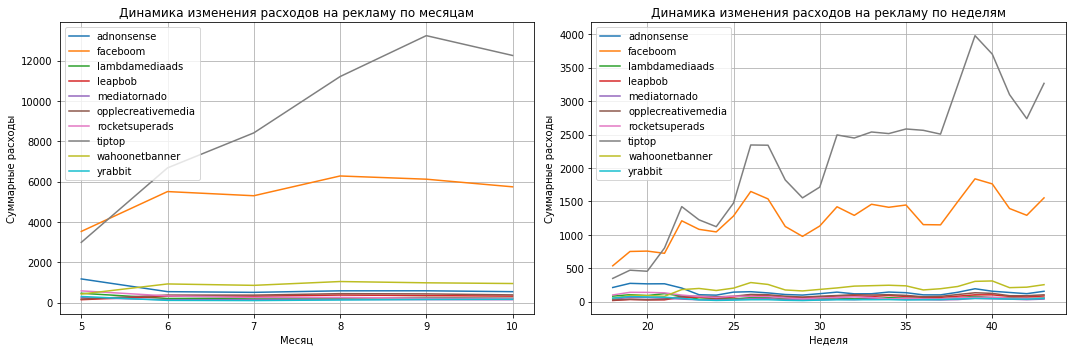

In [33]:
# Построю визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому рекламному каналу.
plt.figure(figsize = (15,5))
#Динамика изменения расходов на рекламу по неделям
ax1 = plt.subplot(1,2,1)
costs_pivot = costs.pivot_table(index='dt_month', columns = 'channel', values = 'costs', aggfunc='sum')
costs_pivot.plot(grid=True, ax = ax1)
plt.legend()
plt.xlabel('Месяц')
plt.ylabel('Суммарные расходы')
plt.title('Динамика изменения расходов на рекламу по месяцам')

#Динамика изменения расходов на рекламу по месяцам
ax2 = plt.subplot(1,2,2)
costs_pivot = costs.pivot_table(index='dt_week', columns = 'channel', values = 'costs', aggfunc='sum')
costs_pivot.plot(grid=True, ax = ax2)
plt.legend()
plt.xlabel('Неделя')
plt.ylabel('Суммарные расходы')
plt.title('Динамика изменения расходов на рекламу по неделям')

plt.tight_layout()
plt.show()

**На графиках видно, что расходы на рекламу в каналах FaceBoom и TipTop значительно выше остальных. При этом затраты на рекламу в TipTop росли быстрее, а затраты на FaceBoom стабилизировались за последние два месяца и перестали так активно расти. От недели к неделе затраты на эти компании заметно менялись, но все равно имели общую тенденцию к росту. Расходы на рекламу в остальных каналах практически одинаковы и неизменны.**

#### Стоимость привлечения одного клиента

In [34]:
# Посчитаю, сколько в среднем стоит привлечение одного пользователя (CAC) из каждого рекламного канала. 
cac_by_channel = profiles.groupby('channel')['acquisition_cost'].agg('mean').sort_values(ascending = False)
cac_by_channel

channel
tiptop                2.799003
faceboom              1.113286
adnonsense            1.008054
lambdamediaads        0.724802
wahoonetbanner        0.602245
rocketsuperads        0.412095
opplecreativemedia    0.250000
yrabbit               0.218975
mediatornado          0.218717
leapbob               0.210172
organic               0.000000
Name: acquisition_cost, dtype: float64

Наибольшая стоимость привлечения одного клиента у канала TipTop.

In [35]:
# Посчитаю средний САС 
print('Средняя стоимость привлечения одного клиетна составляет ', cac_by_channel.mean().round(2))

Средняя стоимость привлечения одного клиетна составляет  0.69


In [36]:
# Посчитаю средний САС без учета пользователей, привлеченныз естественным путем
print('Средняя стоимость привлечения одного клиетна составляет ', 
      profiles.query('channel != "organic"').acquisition_cost.mean().round(2))

Средняя стоимость привлечения одного клиетна составляет  1.13


**Вывод.**

**Наибольшая стоимость привлечения одного клиента через рекламный канал TipTop, наименьшая - через канал LeapBob. 
Средняя стоимость привлечения одного клиетна по всем рекламным компаниям составляет 0.69, без учета органических пользоваталей - 1.13.**

### Оцените окупаемость рекламы

#### Момент и горизонт анализа
Проанализирую окупаемость рекламы, считая, что на календаре сейчас 1 ноября 2019 года. В бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Исключу из анализа органических пользователей, т.к. они не связаны с затратами на рекламу.

In [37]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14
profiles = profiles.query('channel != "organic"')

#### Анализ окупаемости рекламы

Проанализирую окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.

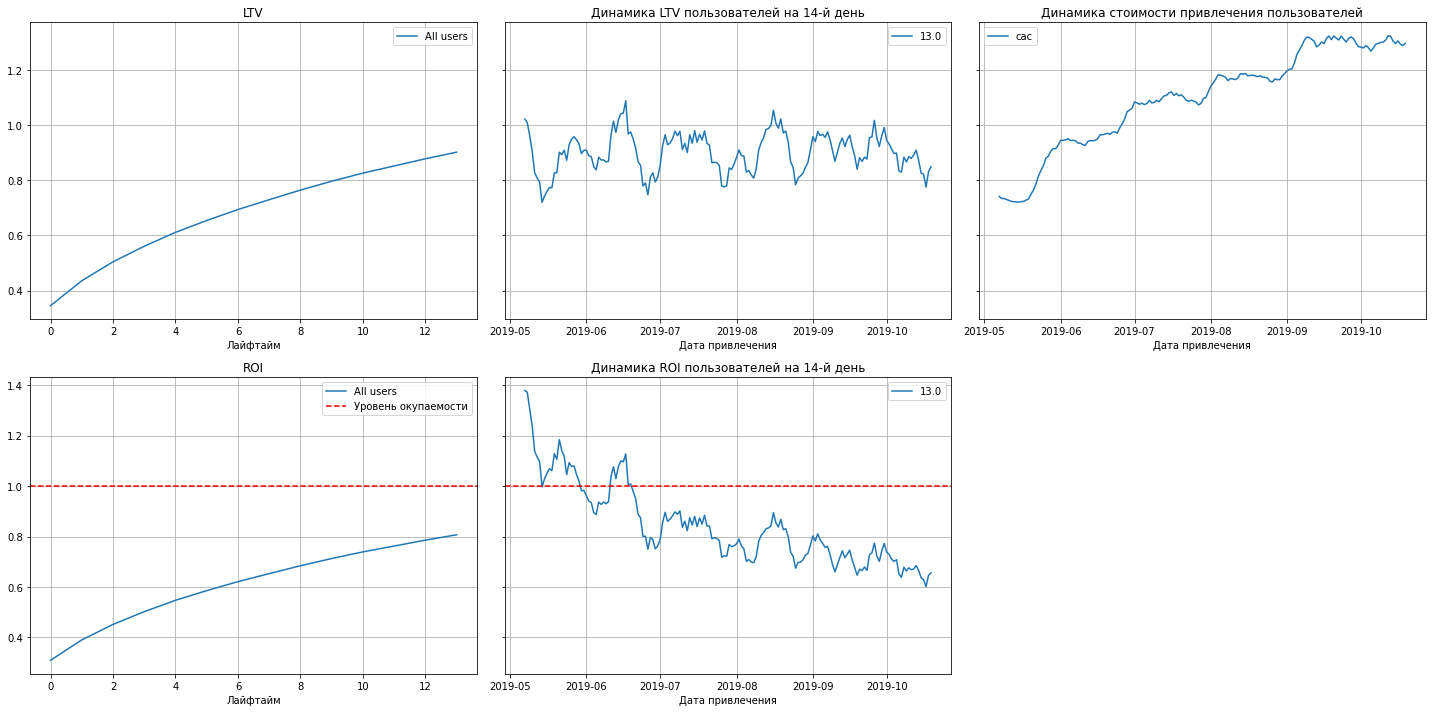

In [38]:
# Посчитаю LTV и ROI с помощью заданной ранее функции
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)
# Построю графики с помощью заданной ранее функции
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**На основании полученных графиков можно сделать следующие выводы:**
- Реклама не окупается, ROI в конце рассматриваемого периода составляет чуть более 80%.
- CAC увеличивается, значит растут расходы на рекламу.
- LTV достаточно стабилен, значит, пользователи примерно одинакового качества.
- Наблюдается небольшой положительный промежуток времени по ROI в начале.

#### Изучение конверсии и удержания пользователей

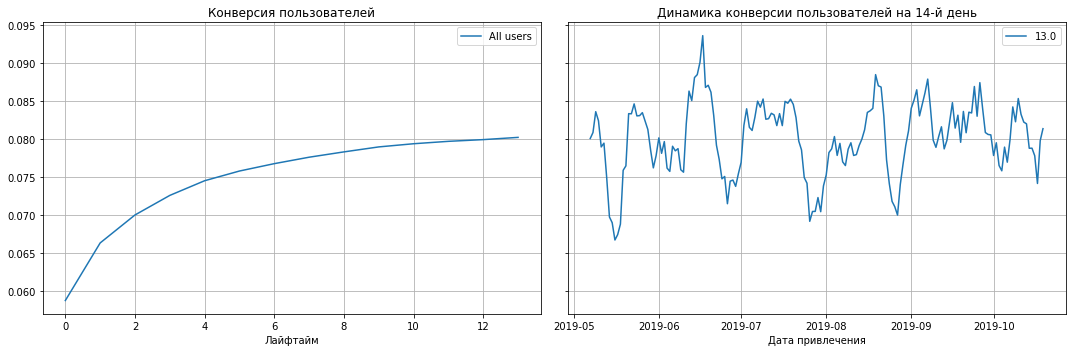

In [39]:
# Посчитаю и визуализирую конверсию и динамику её изменения с помощью ранее заданной функции
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**На основании полученных графиков можно сделать вывод о том, что пользователи  хорошо конвертируются.**

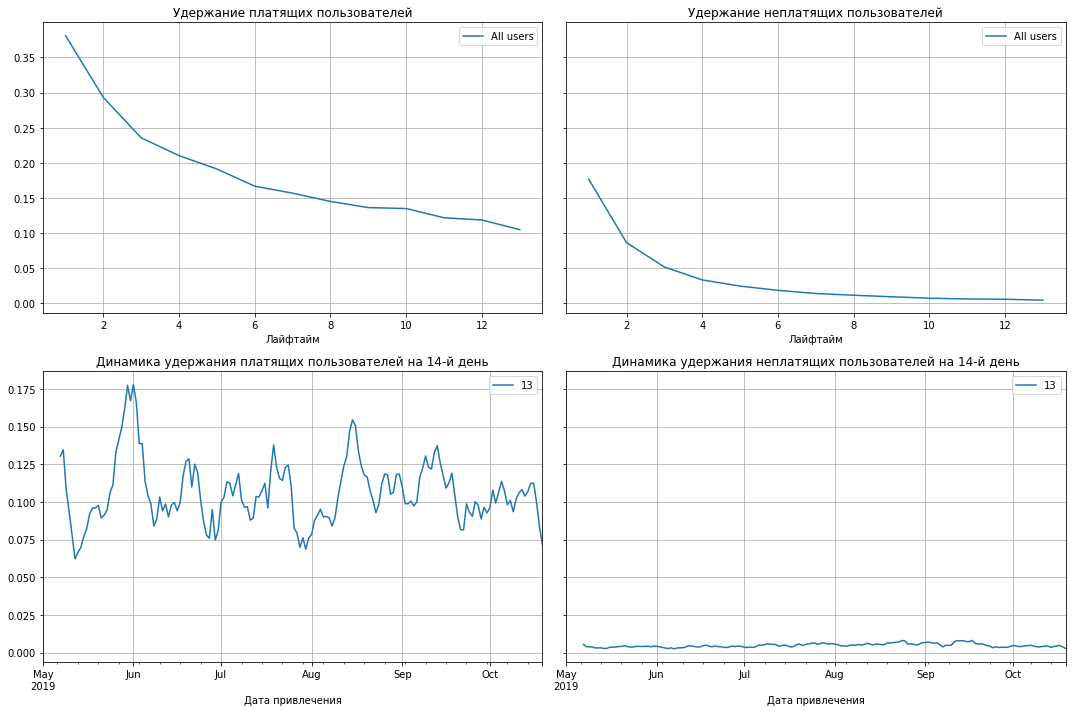

In [40]:
# Посчитаю и визуализирую удержание пользователей и динамику его изменения с помощью ранее заданной функции

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**На графиках отражена динамика удержания пользоваталей. Оно снижается, при этом удержание платящих пользователей выше, чем неплатящих.**

**Это не объясняет неокупаемость рекламы. Чтобы разобраться в причинах, пройдём по всем доступным характеристикам пользователей — устройству первого посещения, стране и источнику.**

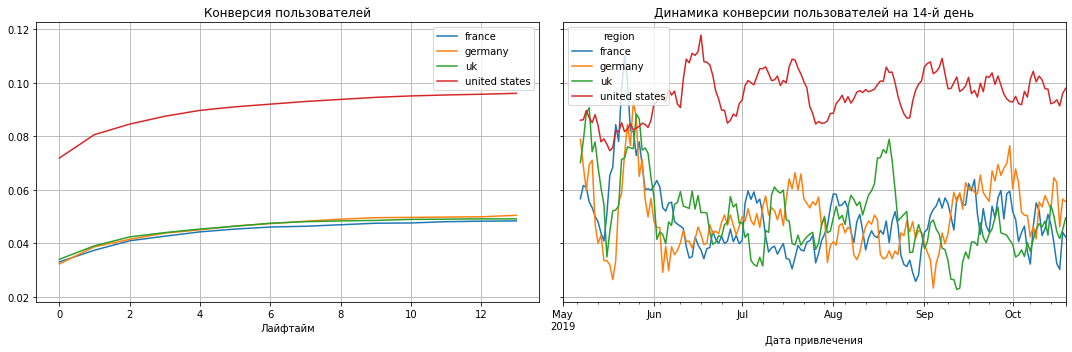

In [41]:
# Посмотрю конверсию с разбивкой по странам
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Конверсия пользователей США значительно выше, чем у пользователей других регионов. Динамика конверсии на 14-й день также стабильна.**

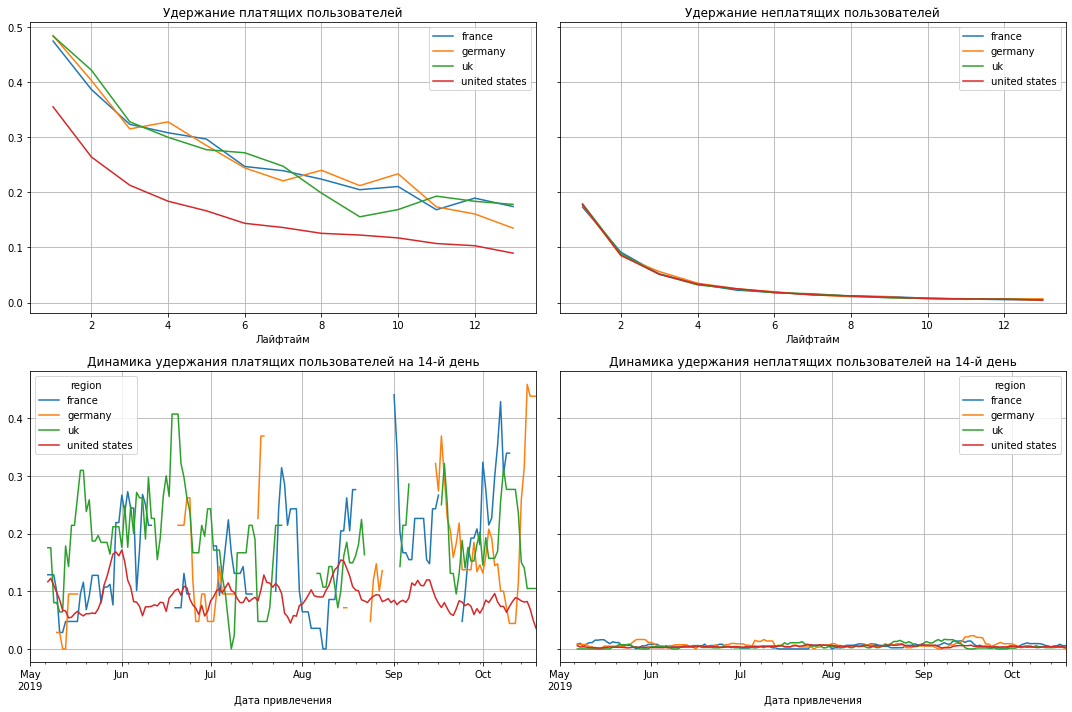

In [42]:
# Посмотрю удержание с разбивкой по странам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)
plot_retention(retention_grouped, retention_history, horizon_days)

**Коэффициент удержания платящих пользователей из США ниже, чем в остальных странах. То есть несмотря на высокую конверсию, покупатели из США быстро покидают приложение.**

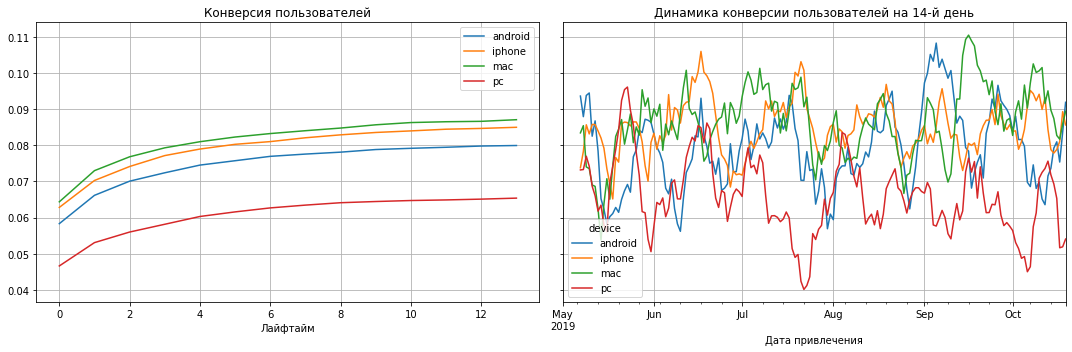

In [43]:
# Посмотрю конверсию с разбивкой по устройствам
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Пользователи Mac, iPhone и Android конвертируются лучше, чем пользователи PC.**

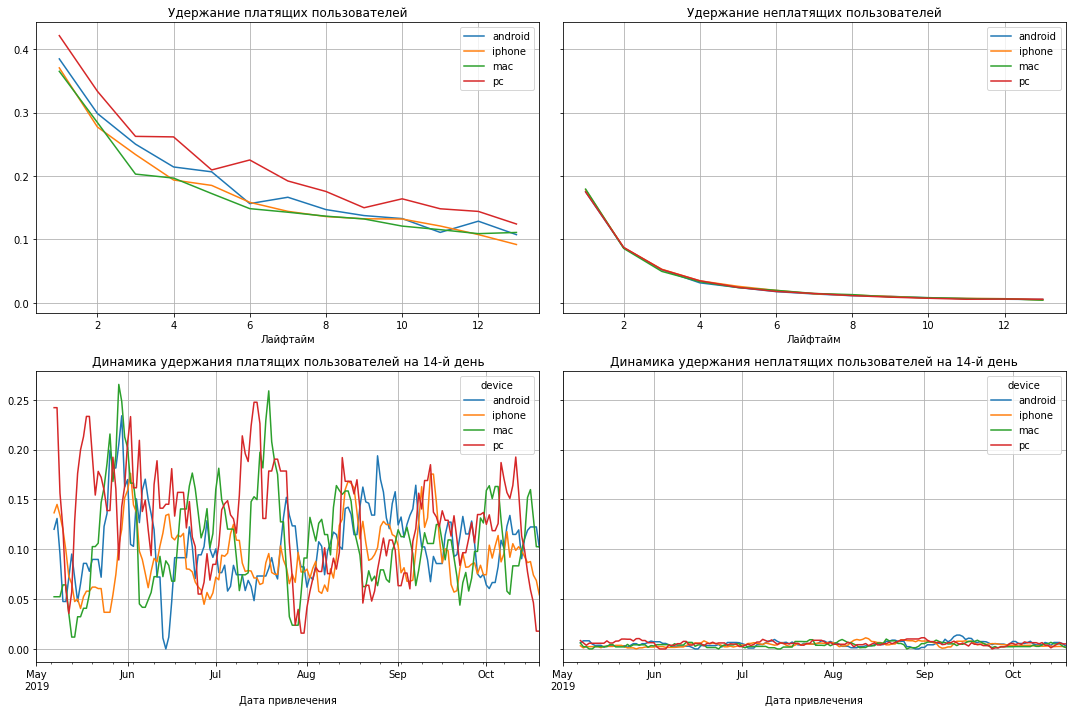

In [44]:
# Посмотрю удержание с разбивкой по устройствам
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)
plot_retention(retention_grouped, retention_history, horizon_days)

**Удержание у пользователей PC немного выше остальных. Но в целом нельзя сказать, что какой-то тип устройства может быть причиной низкой окупаемости.**

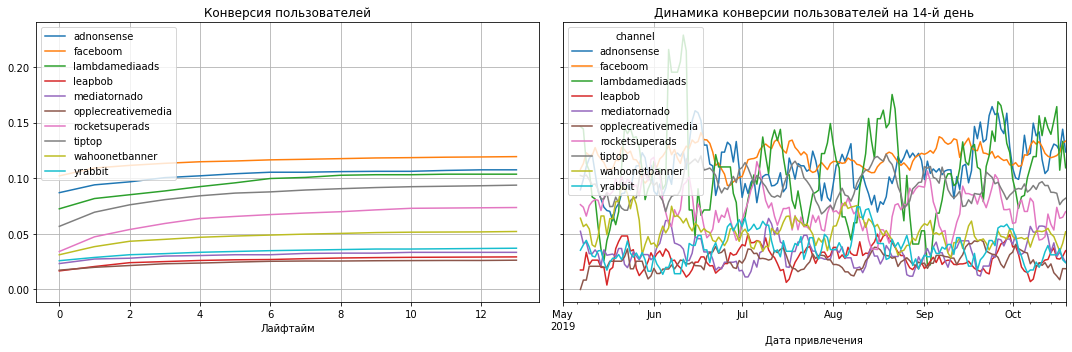

In [45]:
# Посмотрю конверсию с разбивкой по каналам привлечения
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Лучше всего конвертируются пользователи, пришедшие из FaceBoom, AdNonSense, lambdaMediaAds и TipTop. Далее идут по убыванию остальные каналы.**

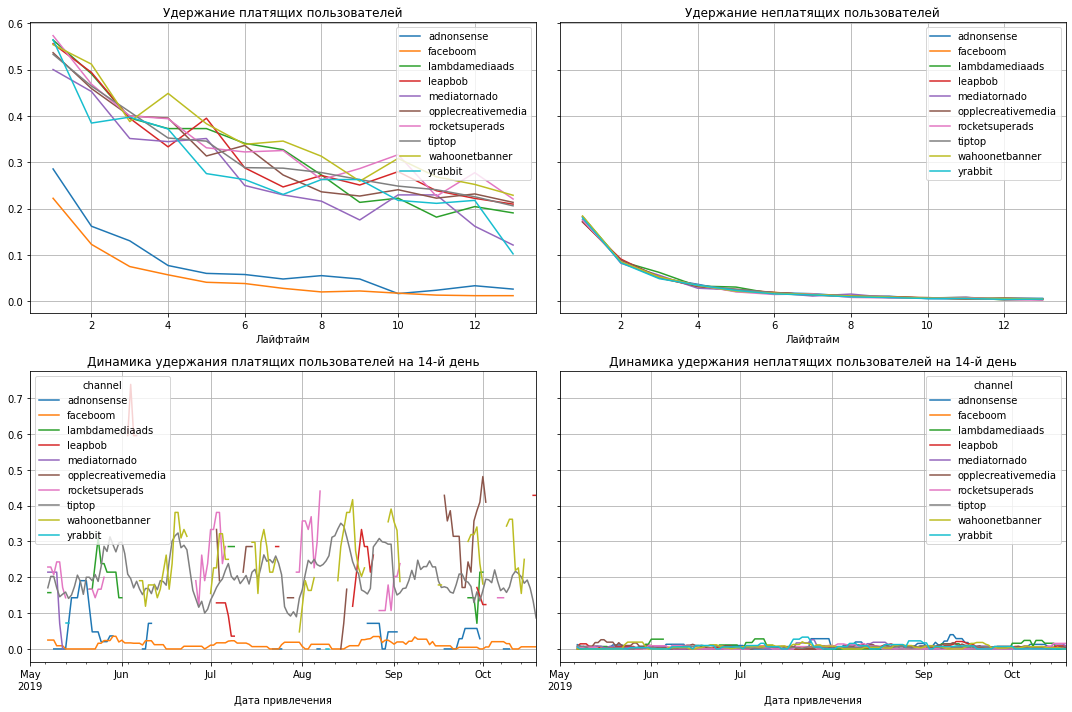

In [46]:
# Посмотрю удержание с разбивкой по каналам привлечения
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)
plot_retention(retention_grouped, retention_history, horizon_days)

**Несмотря на высокую конверсию, пользователи, пришедшие из AdNonSense и FaceBoom плохо удерживаются.**

#### Анализ окупаемости рекламы с разбивкой по устройствам

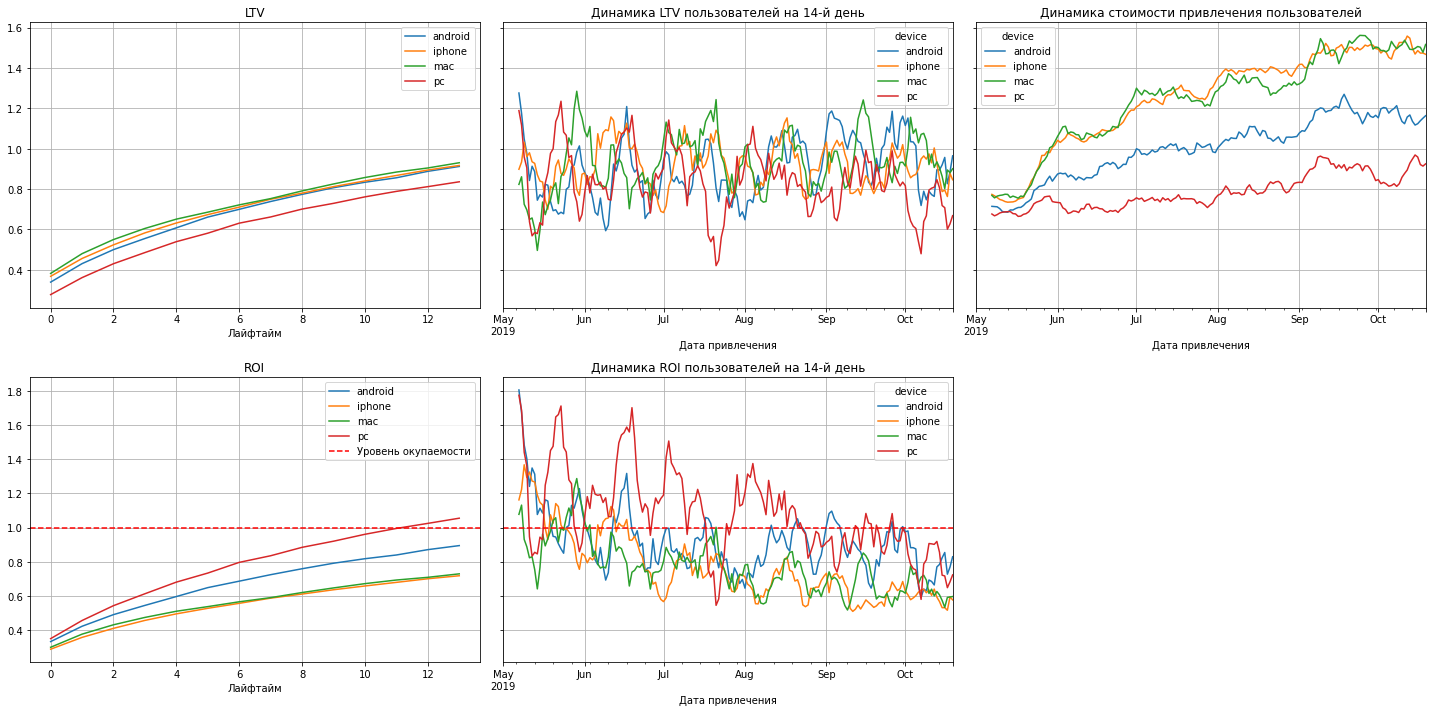

In [47]:
# Передаю параметру dimensions столбец device
dimensions = ['device']
# Считаю LTV и ROI с помощью ранее заданной функции
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
# Строим графики с помощью ранее заданной функции
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**На основании полученных графиков можно сделать следующие выводы:**
- Реклама не окупается у пользоваталей практически всех устройств. Только у пользоваталей PC к концу рассматриваемого периода окупаемость немного превысила 100%. 
- Динамика ROI всех устройств также падает.
- Стоимость привлечения растет на всех устройствах.
- LTV в разбивке по устройствам по-прежнему достаточно стабилен. Значит, дело не в ухудшении качества пользователей какой-то отдельной группы устройств.

#### Анализ окупаемости рекламы с разбивкой по странам

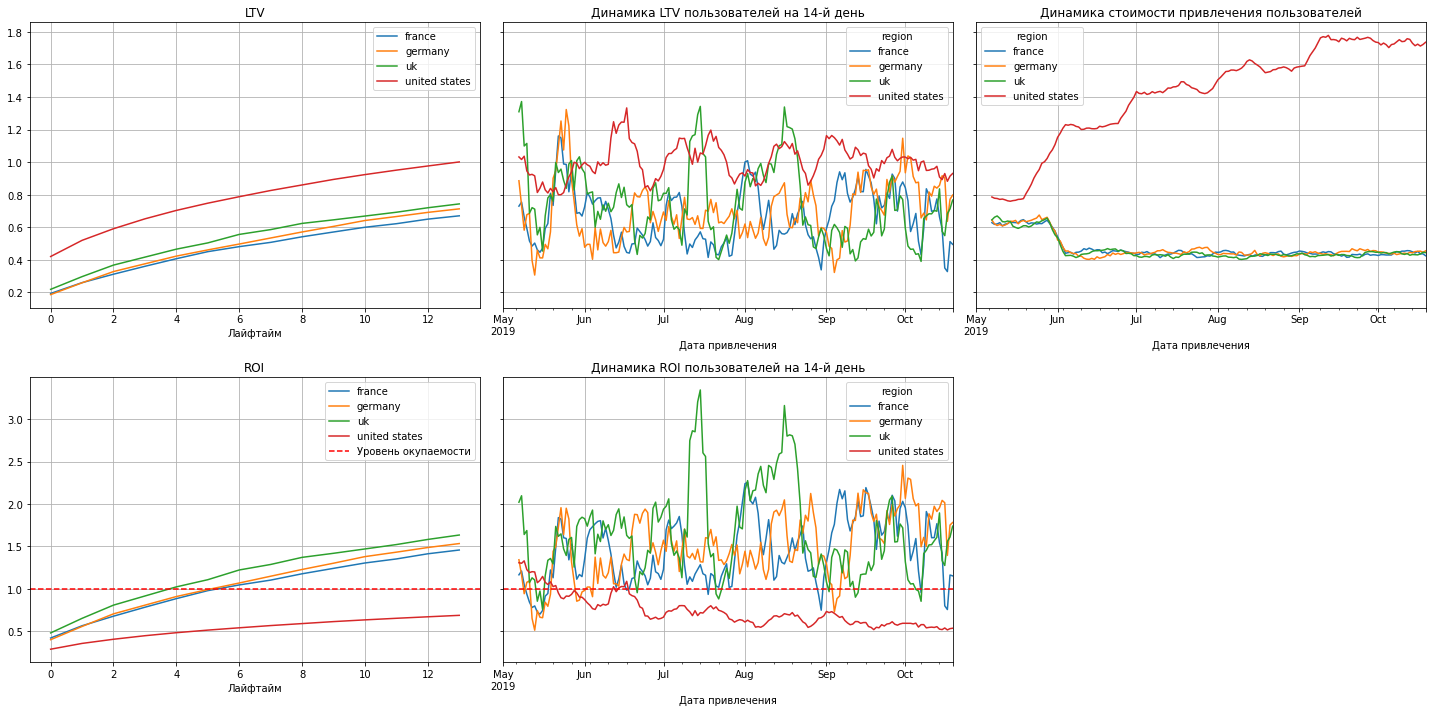

In [48]:
# Передаю параметру dimensions столбец region.
dimensions = ['region']
# Считаею LTV и ROI с помощью ранее заданной функции
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
# Строю графики с помощью ранее заданной функции
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**На основании полученных графиков можно сделать следующие выводы:**
- Стоимость рекламы для пользователей из США сильно растет от месяца к месяцу и не окупается. 
- Для пользоваталей в остальных странах цена на рекламу снизилась в июне 2019 г. и осталась стабильной. С этого периода реклама начала вокупаться.
- При этом, несмотря на неокупаемость рекламы, пользователи из США приносят компании больше всего прибыли.

#### Аназиз окупаемости рекламы с разбивкой по рекламным каналам

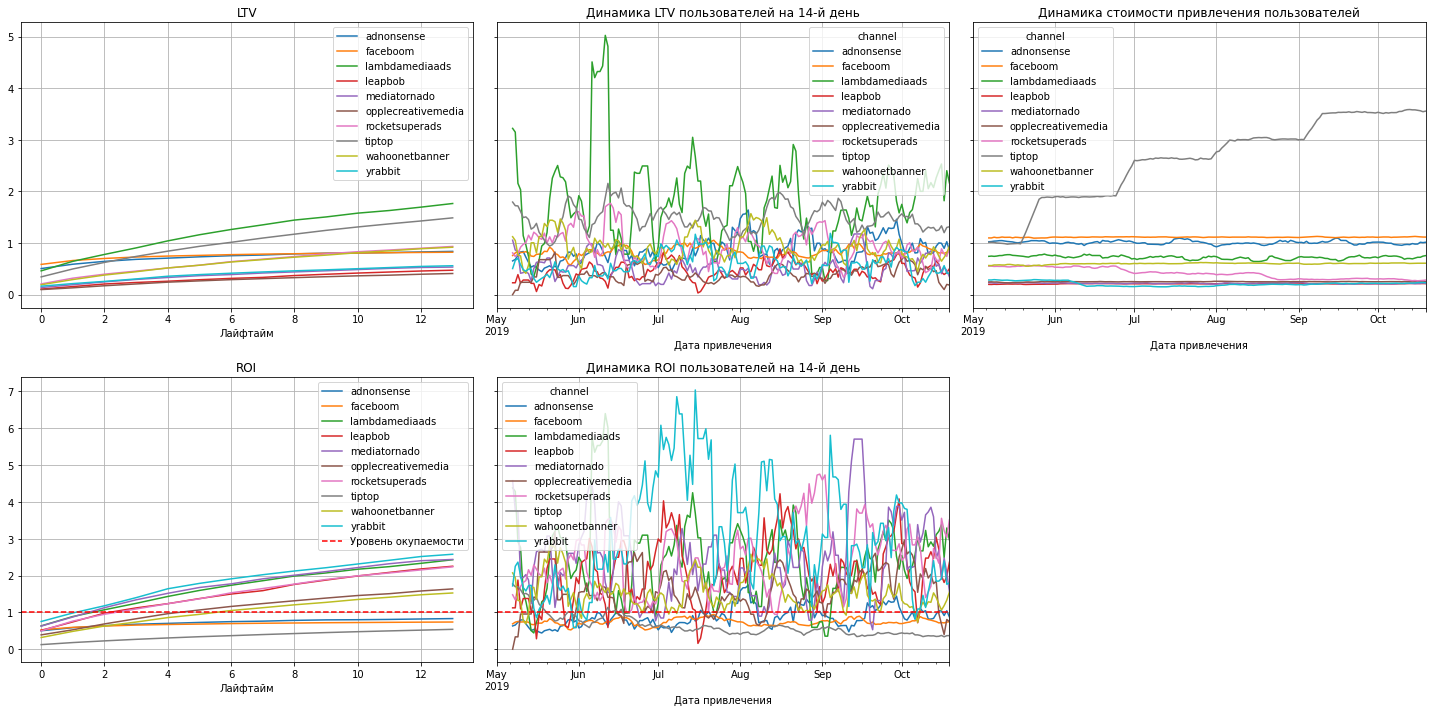

In [49]:
# Передаю  параметру dimensions столбец channel.
dimensions = ['channel']
# Считаею LTV и ROI с помощью ранее заданной функции
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
# Строю графики с помощью ранее заданной функции
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**На основании полученных графиков можно сделать следующие выводы:**
- Реклама в каналах AdNonSense, FaceBoom, TipTop не окупается.
- В остальных каналах реклама начала окупаться с 2-5 месяца.
- CAC пользоваталей, привлеченных каналом TipTop, сильно увеличивался от месяца к месяцу. В то время как стоимость привлечения клиентов через остальные каналы остается стабильной. Таким образом, проблема окупаемости рекламы может быть связана с увеличением расходов на рекламу через канал TipTop.
- Больше всего выручки принесли пользователи, пришедшие благодаря рекламной компании канала lambdaMediaAds, но самым прибыльным оказался канал YRabbit.

**Выводы по результатам оценки окупаемости рекламы:**
- В целом реклама, направленная на привлечение пользователей, не окупается.
- Негативное влияние на окупаемость рекламы оказывают рекламные компании в США и реклама в канале TipTop.
- Больше всего выручки принесли пользователи, пришедшие благодаря рекламной компании канала lambdaMediaAds, но самым прибыльным оказался канал YRabbit.
- Учитывая стабильность LTV и постоянную конверсию пользователей, проблема окупаемости может быть связана с увеличением расходов на рекламу.

В связи с полной неокупаемостью рекламы на рынке США рассмотрю отдельно бизнес-показатели американского рынка.

In [50]:
#Выделю профили пользователей США
profiles_usa = profiles.query('region == "united states"')

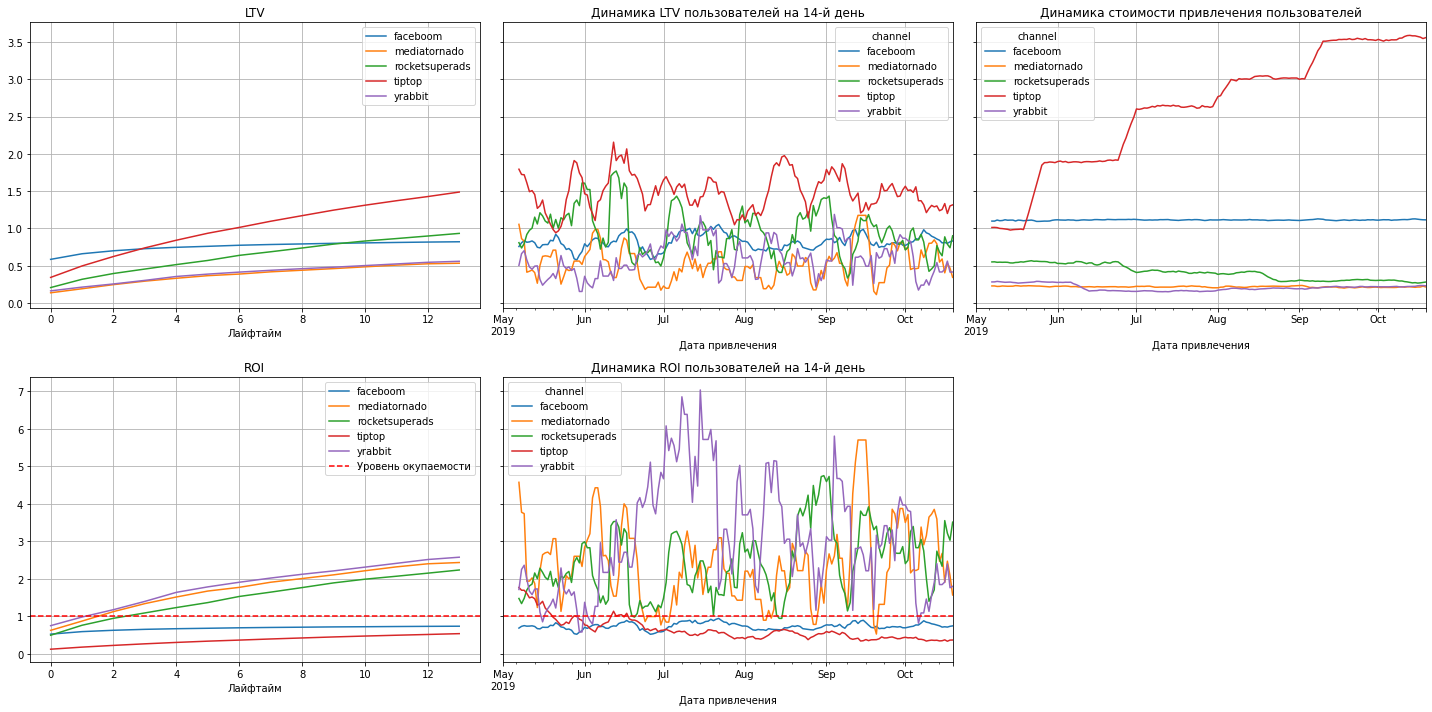

In [51]:
# Рассмотрю окупаемость рекламы в США с разбивкой по каналам
dimensions = ['channel']
# Считаю LTV и ROI с помощью ранее заданной функции
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)
# Строю графики с помощью ранее заданной функции
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**На основании полученных графиков можно сделать следующие выводы:**
- Несмотря на то, что канал TipTop приносит больше всего выручки, расходы на рекламу на нем, а так же на FaceBoom абсолютно не окупаются.
- Кроме того стоимость привлечения одного клиента на TipTop значительно выше, чем на других каналах, и к тому же постоянно возрастает.
- Исходя из этого, можно сделать вывод, что основной причиной неокупаемости рекламы в США являются инвестиции в рекламу на канале TipTop.

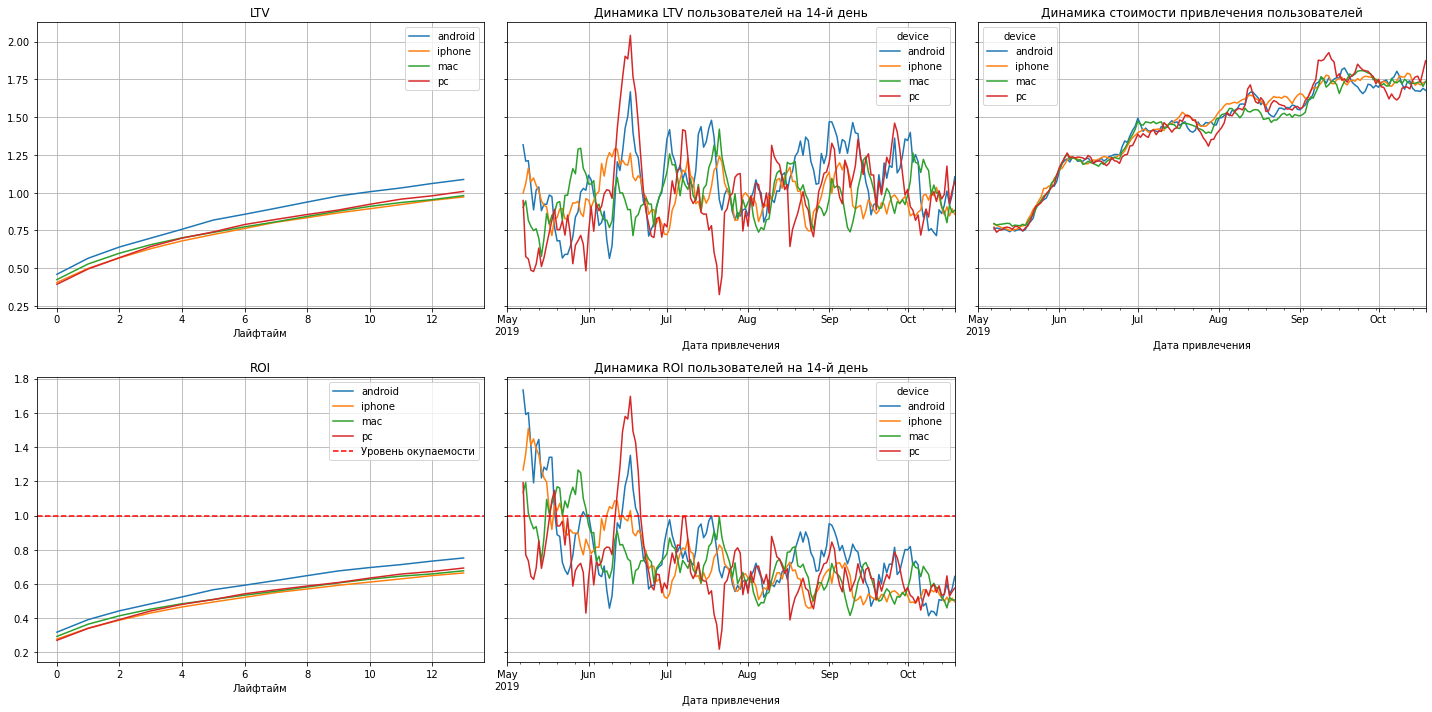

In [52]:
# Рассмотрю окупаемость рекламы в США с разбивкой по устройствам
dimensions = ['device']
# Считаею LTV и ROI с помощью ранее заданной функции
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)
# Строю графики с помощью ранее заданной функции
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

**На основании полученных графиков можно сделать следующие выводы:**
- В США реклама не окупается ни на одном устройстве.
- При этом не наблюдается отличий в показателях по устройствам.
- Поэтому нельзя сказать, что использование пользователями какого-то устройства негативно влияет на окупаемость рекламы.

### Общий вывод

Для того, чтобы разобраться в причинах убытков компании и помочь ей выйти в плюс, был проведен исследовательский анализ данных о посещениях сайта, заказах и расходах на рекламу.

Изучив пользоваталей, привлеченных с 1 мая 2019 года по 27 октября 2019 года, были сделаланы следующие выводы: 
- Больше всего платящих пользователей приходит из США, используют iPhone и привлечены в результате рекламной компании в FaceBoom.
- Наименьшее количество платящих пользоваталей из Германи, используют pc и привлечены рекламной компанией в MediaTornado.
- Наибольшая стоимость привлечения одного клиента через рекламный канал TipTop, наименьшая - через канал LeapBob.
- В целом реклама, направленная на привлечение пользователей, не окупается.
- Негативное влияние на окупаемость рекламы оказывают рекламные компании в США и реклама в канале TipTop.
- Больше всего выручки принесли пользователи, пришедшие благодаря рекламной компании канала LambdaMediaads, но самым прибыльным оказался канал YRabbit.
- Учитывая стабильность LTV и постоянную конверсию пользователей, проблема окупаемости может быть связана с увеличением расходов на рекламу.

**Рекомендации для отдела маркетинга:**
- На окупаемость оказали негативное влияние рекламные компании в США и реклама в канале TipTop. Расходы на эти рекламные компании следует сократить.
- Стоит рассмотреть целесообразность вложений в рекламу на каналах AdNonSense, FaceBoom, т.к. на них реклама не окупается.
- Следует сохранить объемы рекламы на канале LambdaMediaads, т.к. он принес больше всего выручки.
- Стоит увеличить количество рекламных компаний в канале YRabbit для привлечения большего количества пользоваталей. В рассмотренном периоде он оказался самым прибыльным в расчете на одного пользователя, при этом привлек относительно небольшое число клиентов.
- Можно больше внимания уделить рекламному каналу LeapBob как имеющему наименьшую стоимость привлечения одного клиента.
